# Ablation Study  - Evaluation
Here, we evaluate the impact of a size-reduced data set on the performance. We expect that a reduced data set will show contain less data variance and thus generalization will be lower.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import pickle
import numpy as np

from SlideRunner.dataAccess.database import Database
from lib.calculate_F1 import *


## Optimization of thresholds

The thresholds are always optimized on the complete WSI of the train+val set.  We optimize thresholds for both, the single stage (RetinaNet) and the dual stage approach.

In [2]:
datasets = ['CCMCT_ODAEL_5HPF', 'CCMCT_ODAEL_10HPF', 'CCMCT_ODAEL_50HPF', 'CCMCT_ODAEL']

models = ['RetinaNet-ODAEL-5HPF-export.pth',
          'RetinaNet-ODAEL-10HPF-export.pth', 
          'RetinaNet-ODAEL-50HPF-export.pth',
          'RetinaNet-ODAEL-export.pth',
          'RetinaNet-ODAEL-3WSI-export.pth',
          'RetinaNet-ODAEL-6WSI-export.pth',
          'RetinaNet-ODAEL-12WSI-export.pth',
          ]

dataset_names = {'RetinaNet-ODAEL-5HPF-export.pth': 'CCMCT_ODAEL_5HPF',
                     'RetinaNet-ODAEL-10HPF-export.pth': 'CCMCT_ODAEL_10HPF',
                     'RetinaNet-ODAEL-50HPF-export.pth': 'CCMCT_ODAEL_50HPF',
                     'RetinaNet-ODAEL-export.pth': 'CCMCT_ODAEL',
                     'RetinaNet-ODAEL-3WSI-export.pth': 'ODAEL_3WSI',
                     'RetinaNet-ODAEL-6WSI-export.pth': 'ODAEL_6WSI',
                     'RetinaNet-ODAEL-12WSI-export.pth': 'ODAEL_12WSI',

                }

original_database = {'RetinaNet-ODAEL-5HPF-export.pth': 'MITOS_WSI_CCMCT_ODAEL_5HPF.sqlite',
                     'RetinaNet-ODAEL-10HPF-export.pth': 'MITOS_WSI_CCMCT_ODAEL_10HPF.sqlite',
                     'RetinaNet-ODAEL-50HPF-export.pth': 'MITOS_WSI_CCMCT_ODAEL_50HPF.sqlite',
                     'RetinaNet-ODAEL-export.pth': 'MITOS_WSI_CCMCT_ODAEL.sqlite',
                     'RetinaNet-ODAEL-3WSI-export.pth': 'MITOS_WSI_CCMCT_ODAEL_3WSI.sqlite',
                     'RetinaNet-ODAEL-6WSI-export.pth': 'MITOS_WSI_CCMCT_ODAEL_6WSI.sqlite',
                     'RetinaNet-ODAEL-12WSI-export.pth': 'MITOS_WSI_CCMCT_ODAEL_12WSI.sqlite',
                    }

thresholds = dict()
thresholds_2stage = dict()
dbpath = 'AblationStudy/databases/'
for m in models:
    print ('===== %s ===== ' % m)

    resfile = m+'-'+dataset_names[m]+'-val-inference_results_boxes.p.bz2'

    thresholds[m], _,_ = optimize_threshold(databasefile=dbpath+original_database[m], resfile='AblationStudy/results/'+resfile, minthres=0.20)
    thresholds_2stage[m], _,_ = optimize_threshold(databasefile=dbpath+original_database[m], resfile='AblationStudy/results/2ndstage_'+resfile, minthres=0.20)    

===== RetinaNet-ODAEL-5HPF-export.pth ===== 
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.20773313115996966 Threshold= 0.7700000000000005
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.5152542372881356 Threshold= 0.2900000000000001
===== RetinaNet-ODAEL-10HPF-export.pth ===== 
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.8105906313645621 Threshold= 0.6500000000000004
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.8071872840359364 Threshold= 0.7600000000000005
===== RetinaNet-ODAEL-50HPF-export.pth ===== 
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.6858422321736135 Threshold= 0.6900000000000004
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.8301960784313726 Threshold= 0.5700000000000003
===== RetinaNet-ODAEL-export.pth ===== 
Optimizing threshold for validation set of 21 files: 
Best threshold: F1= 0.62853863

## Inference on test set
Now calculate the final score on the original test set.

In [3]:
F1_1ststage = dict()
F1_1ststage_val = dict()

F1_2ndstage = dict()
F1_2ndstage_val = dict()

fulldb = 'databases/MITOS_WSI_CCMCT_ODAEL.sqlite'
ablres = 'AblationStudy/results/'
for m in models[:4]:
    print ('===== %s ===== ' % m)
    resfile = m+'-'+dataset_names[m]+'-inference_results_boxes.p.bz2'

    F1_1ststage_val[m], _ = calculate_F1(databasefile=dbpath+original_database[m], resfile=ablres+resfile, det_thres=thresholds[m], hotclass=2)
    F1_2ndstage_val[m], _ = calculate_F1(databasefile=dbpath+original_database[m], resfile=ablres+'2ndstage_'+resfile, det_thres=thresholds_2stage[m], hotclass=2)

    resfile_full = m+'-CCMCT_ODAEL-inference_results_boxes.p.bz2'
    F1_1ststage[m], _ = calculate_F1(databasefile=fulldb, resfile=ablres+resfile_full, det_thres=thresholds[m], hotclass=2)
    F1_2ndstage[m], _ = calculate_F1(databasefile=fulldb, resfile=ablres+'2ndstage_'+resfile_full, det_thres=thresholds_2stage[m], hotclass=2)

===== RetinaNet-ODAEL-5HPF-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 35.0 FP: 239 FN:  113.0 F1: 0.16587677725118483
Calculating F1 for test set of 11 files
Overall: 
TP: 39.0 FP: 29.0 FN:  109.0 F1: 0.3611111111111111
Calculating F1 for test set of 11 files
Overall: 
TP: 16616 FP: 22266 FN:  5860 F1: 0.541608266240751
Calculating F1 for test set of 11 files
Overall: 
TP: 18430 FP: 22306 FN:  4046 F1: 0.5831171296589255
===== RetinaNet-ODAEL-10HPF-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 196 FP: 63 FN:  100 F1: 0.7063063063063063
Calculating F1 for test set of 11 files
Overall: 
TP: 214 FP: 40 FN:  82 F1: 0.7781818181818182
Calculating F1 for test set of 11 files
Overall: 
TP: 14538 FP: 10059 FN:  7938 F1: 0.6176789242240774
Calculating F1 for test set of 11 files
Overall: 
TP: 15578 FP: 8027 FN:  6898 F1: 0.6761137996137236
===== RetinaNet-ODAEL-50HPF-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 12

In [4]:
F1_1ststage_w = dict()

F1_2ndstage_w = dict()

fulldb = 'databases/MITOS_WSI_CMCT_ODAEL.sqlite'
ablres = 'AblationStudy/results/'
for m in models[3:]:
    print ('===== %s ===== ' % m)
    resfile = m+'-'+dataset_names[m]+'-inference_results_boxes.p.bz2'

    F1_1ststage_w[m], _ = calculate_F1(databasefile=dbpath+original_database[m], resfile=ablres+resfile, det_thres=thresholds[m], hotclass=2)
    F1_2ndstage_w[m], _ = calculate_F1(databasefile=dbpath+original_database[m], resfile=ablres+'2ndstage_'+resfile, det_thres=thresholds_2stage[m], hotclass=2)



===== RetinaNet-ODAEL-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 16074 FP: 11216 FN:  6402 F1: 0.64598320138247
Calculating F1 for test set of 11 files
Overall: 
TP: 18248 FP: 3783 FN:  4228 F1: 0.8200058417776979
===== RetinaNet-ODAEL-3WSI-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 13489 FP: 4770 FN:  8987 F1: 0.6622805940837118
Calculating F1 for test set of 11 files
Overall: 
TP: 15751 FP: 2580 FN:  6725 F1: 0.7719753963780724
===== RetinaNet-ODAEL-6WSI-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 13236 FP: 9771 FN:  9240 F1: 0.5820196556955346
Calculating F1 for test set of 11 files
Overall: 
TP: 17291 FP: 3226 FN:  5185 F1: 0.8043635010350522
===== RetinaNet-ODAEL-12WSI-export.pth ===== 
Calculating F1 for test set of 11 files
Overall: 
TP: 15624 FP: 13065 FN:  6852 F1: 0.6107299912049252
Calculating F1 for test set of 11 files
Overall: 
TP: 18189 FP: 3813 FN:  4287 F1: 0.8178874949413193


## Plotting of results

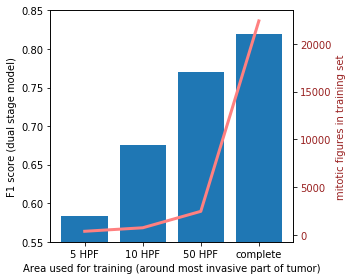

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.bar(x=[0,1,2,3],height=[F1_2ndstage[x] for x in F1_2ndstage])

ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['5 HPF','10 HPF','50 HPF','complete'])
plt.xlabel('Area used for training (around most invasive part of tumor)')
plt.ylabel('F1 score (dual stage model)')
plt.savefig('')
plt.ylim([0.55,0.85])
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = '#ff8080'
colortext = '#992222'


ax2.set_ylabel('mitotic figures in training set', color=colortext)  # we already handled the x-label with ax1
ax2.plot([0,1,2,3], [378,745,2467,22404], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=colortext)
plt.tight_layout()
plt.savefig('F1score_AblationStudy_HPF.pdf')

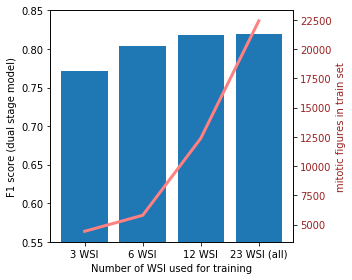

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
order = [models[4], models[5], models[6], models[3]]
plt.bar(x=[0,1,2,3],height=[F1_2ndstage_w[x] for x in order])

ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['3 WSI','6 WSI','12 WSI','23 WSI (all)'])
plt.xlabel('Number of WSI used for training')
plt.ylabel('F1 score (dual stage model)')
plt.ylim([0.55,0.85])

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = '#ff8080'
colortext = '#992222'
ax2.set_ylabel('mitotic figures in train set', color=colortext)  # we already handled the x-label with ax1
ax2.plot([0,1,2,3], [4432,5798,12370,22404], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=colortext)
plt.tight_layout()
plt.savefig('F1score_AblationStudy_WSI.pdf')